# Contents: SARSA

In this notebook, you will implement SARSA Reinforcement learning algorithm for Frozen Lake Environment.

Write the code to define and train the agent.
Make sure to include a visualization of the end result in form of a video.

## Frozen Lake

Frozen lake is a toy text environment involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. <br>

We can also set the lake to be slippery so that the agent does not always move in the intended direction. \but here, we will only look at the non-slippery case. But you are welcome to try the slippery one.<br>

You can read more about the environment [here](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

![Frozen Lake](https://gymnasium.farama.org/_images/frozen_lake.gif)


## OpenAI Gym

[OpenAI Gym](https://www.gymlibrary.dev/) is a toolkit for developing and comparing reinforcement learning (RL) algorithms. It consists of a growing suite of environments (from simulated robots to Atari games), and a site for comparing and reproducing results. OpenAI Gym provides a diverse suite of environments that range from easy to difficult and involve many different kinds of data.

Creating and Interacting with gym environments is very simple.

```
import gym
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()
```

Following are the definitions of some common terminologies used.

**Reset:** Resets the environment to an initial state and returns the initial observation. <br>
**Step:** Run one timestep of the environment's dynamics.<br>
**Observation:** The observed state of the environment.<br>
**Action:** An action provided by the agent.<br>
**Reward:** The amount of reward returned as a result of taking the action.<br>
**Terminated:** Whether a terminal state (as defined under the MDP of the task) is reached.<br>
**Truncated:** Whether a truncation condition outside the scope of the MDP is satisfied. Typically a timelimit, but could also be used to indicate agent physically going out of bounds.<br>
**Info:** This contains auxiliary diagnostic information (helpful for debugging, learning, and logging).<br>
**Action Space:** This attribute gives the format of valid actions. It is of datatype Space provided by Gym. For example, if the action space is of type Discrete and gives the value Discrete(2), this means there are two valid discrete actions: 0 & 1.<br>
**Observation:** This attribute gives the format of valid observations. It is of datatype Space provided by Gym. For example, if the observation space is of type Box and the shape of the object is (4,), this denotes a valid observation will be an array of 4 numbers.<br>

Note: Previously, `terminated` and `truncated` used to be merged under one variable `done`. <br>


We will use OpenAI Gym for Frozen Lake environment.

## SARSA Algorithm

SARSA algorithm is a slight variation of the Q-Learning algorithm. Q-Learning technique is an Off-Policy technique and uses the greedy approach to learn the Q-value. SARSA technique, on the other hand, is an On-Policy and uses the action performed by the current policy to learn the Q-value.

**Q-Learning:**
$$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha \left [ r(s,a) + \gamma \max_{a'} Q(s_{t+1},a') - Q(s_t,a_t) \right ]$$

**SARSA:**
$$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha \left [ r(s,a) + \gamma Q(s_{t+1},a_{t+1}) - Q(s_t,a_t) \right ]$$

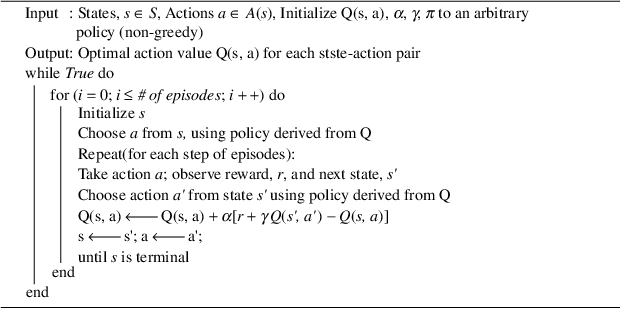

[Image Source](https://www.researchgate.net/publication/228410947_Adaptive_learning_by_a_target-tracking_system)

## Creating the Environment

In [ ]:
import numpy as np
import gym
import random

In [ ]:
# Create the environment
env = gym.make("FrozenLake-v1", is_slippery=False, new_step_api=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Solve here

write the code to define and train the agent:

### Visualization

You are provided with some functions which will help you visualize the results as a video.
Feel free to wrie your own code for visualization if you prefer

In [ ]:
# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob
import base64, io, os

os.environ['SDL_VIDEODRIVER']='dummy'

In [ ]:
os.makedirs("video", exist_ok=True)

def show_video(env_name):
    # Function to show a video in the notebook. Do not modify.
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(env_name, max_steps=100):
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))
    state = env.reset()
    done = False
    for t in range(max_steps):
        vid.capture_frame()

        # Write your code to choose an action here.
        action = 0


        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        print(f"state: {state}, action: {action}",next_state, reward, done)
        state = next_state
        if done:
            break
    vid.close()
    env.close()

In [ ]:
show_video_of_model("FrozenLake-v1")

state: 0, action: 2 1 0.0 False
state: 1, action: 2 2 0.0 False
state: 2, action: 1 6 0.0 False
state: 6, action: 1 10 0.0 False
state: 10, action: 1 14 0.0 False
state: 14, action: 2 15 1.0 True


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment FrozenLake-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [ ]:
show_video("FrozenLake-v1")